In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pickle

# Functions

In [2]:
## For removing states from the datasets
def remove_states(df):
    for i,row in df.iterrows():
        if "County" not in df['Area_name'][i]:
            df.drop([i],inplace=True)

In [3]:
## General cleaning function
def clean_this(df):
    df = pd.DataFrame(df[df['State']!='PR'])
    county_list = [x.split(',')[0] for x in df['Area_name']]
    df['Area_name'] = county_list
    remove_states(df)
    return pd.DataFrame(df)

# Education

In [4]:
df_edu = pd.read_excel('/home/xristsos/flatiron/projects/where-are-missing-voters/new data/Education.xls',skiprows=4)

In [5]:
df_edu.drop([0,1],inplace=True)

In [6]:
df_edu.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2013-17","High school diploma only, 2013-17","Some college or associate's degree, 2013-17","Bachelor's degree or higher, 2013-17","Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,26.9,18.0,4521.0,12363.0,10697.0,9176.0,12.3,33.6,29.1,25.0
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,29.3,23.1,13997.0,39771.0,45286.0,43968.0,9.8,27.8,31.7,30.7
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,8120.0,2242.0,581.0,...,21.3,10.9,4960.0,6549.0,4707.0,2218.0,26.9,35.5,25.5,12.0
5,1007,AL,Bibb County,1.0,1.0,1.0,1.0,5272.0,1402.0,238.0,...,20.4,7.1,2833.0,6958.0,3971.0,2097.0,17.9,43.9,25.0,13.2
6,1009,AL,Blount County,1.0,1.0,1.0,1.0,10677.0,3440.0,626.0,...,24.8,9.6,7980.0,12740.0,13583.0,5172.0,20.2,32.3,34.4,13.1


In [7]:
keep = ['Area name','State',
       'Percent of adults with less than a high school diploma, 2013-17',
       'Percent of adults with a high school diploma only, 2013-17',
       "Percent of adults completing some college or associate's degree, 2013-17",
       "Percent of adults with a bachelor's degree or higher, 2013-17"]

In [8]:
df_edu = pd.DataFrame(df_edu[keep])
df_edu.isna().sum()

Area name                                                                    0
State                                                                        0
Percent of adults with less than a high school diploma, 2013-17             10
Percent of adults with a high school diploma only, 2013-17                  10
Percent of adults completing some college or associate's degree, 2013-17    10
Percent of adults with a bachelor's degree or higher, 2013-17               10
dtype: int64

In [9]:
df_edu.dropna(inplace=True)

In [10]:
for col in df_edu:
    if col == 'Area name' or col == 'State':
        continue
    else:
        df_edu[col] = df_edu[col] / 100

In [11]:
df_edu.rename(columns={'Area name':'Area_name'},inplace=True)

In [12]:
df_edu.head()

,Area_name,State,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
2,Autauga County,AL,0.123,0.336,0.291,0.250
3,Baldwin County,AL,0.098,0.278,0.317,0.307
4,Barbour County,AL,0.269,0.355,0.255,0.120
5,Bibb County,AL,0.179,0.439,0.250,0.132
6,Blount County,AL,0.202,0.323,0.344,0.131


In [13]:
df_edu.shape

(3271, 6)

In [14]:
df_edu = clean_this(df_edu)

In [15]:
df_edu.shape

(3007, 6)

In [16]:
df_edu.tail()

,Area_name,State,"Percent of adults with less than a high school diploma, 2013-17","Percent of adults with a high school diploma only, 2013-17","Percent of adults completing some college or associate's degree, 2013-17","Percent of adults with a bachelor's degree or higher, 2013-17"
3199,Sweetwater County,WY,0.087,0.335,0.355,0.222
3200,Teton County,WY,0.049,0.130,0.280,0.541
3201,Uinta County,WY,0.082,0.374,0.370,0.174
3202,Washakie County,WY,0.115,0.290,0.386,0.210
3203,Weston County,WY,0.081,0.344,0.377,0.198


# Unemployment

In [17]:
df_emp = pd.read_excel('/home/xristsos/flatiron/projects/where-are-missing-voters/new data/Unemployment.xls',skiprows=7)

In [18]:
df_emp.head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,...,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
0,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,4.6,...,160273906.0,153293830.0,6980076.0,4.36,161640488.0,155344043.0,6296445.0,3.9,60336.0,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,...,2178243.0,2081676.0,96567.0,4.40,2198837.0,2112347.0,86490.0,3.9,48193.0,100.0
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,...,25972.0,24958.0,1014.0,3.90,25957.0,25015.0,942.0,3.6,58343.0,121.1
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,...,92090.0,88342.0,3748.0,4.10,93849.0,90456.0,3393.0,3.6,56607.0,117.5
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,...,8317.0,7831.0,486.0,5.80,8373.0,7940.0,433.0,5.2,32490.0,67.4


In [19]:
df_emp.drop([0,1],inplace=True)

In [20]:
df_emp.dropna(inplace=True)

In [21]:
keepe = ['State','Area_name','Unemployed_2017', 'Unemployment_rate_2017',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Unemployment_rate_2018', 'Median_Household_Income_2017',
       'Med_HH_Income_Percent_of_State_Total_2017']
df_emp = pd.DataFrame(df_emp[keepe])

In [22]:
df_emp.head()

,State,Area_name,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2017,Med_HH_Income_Percent_of_State_Total_2017
2,AL,"Autauga County, AL",1014.0,3.9,25957.0,25015.0,942.0,3.6,58343.0,121.1
3,AL,"Baldwin County, AL",3748.0,4.1,93849.0,90456.0,3393.0,3.6,56607.0,117.5
4,AL,"Barbour County, AL",486.0,5.8,8373.0,7940.0,433.0,5.2,32490.0,67.4
5,AL,"Bibb County, AL",376.0,4.4,8661.0,8317.0,344.0,4.0,45795.0,95.0
6,AL,"Blount County, AL",999.0,4.0,25006.0,24128.0,878.0,3.5,48253.0,100.1


In [23]:
df_emp.columns

Index(['State', 'Area_name', 'Unemployed_2017', 'Unemployment_rate_2017',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Unemployment_rate_2018', 'Median_Household_Income_2017',
       'Med_HH_Income_Percent_of_State_Total_2017'],
      dtype='object')

In [24]:
df_emp.shape

(3136, 10)

In [25]:
df_emp = clean_this(df_emp)

In [26]:
df_emp.shape

(3006, 10)

In [27]:
df = pd.concat([df_edu,df_emp],axis=1)

df = df.loc[:,~df.columns.duplicated()]

# Population

In [28]:
pop_df = pd.read_excel('/home/xristsos/flatiron/projects/where-are-missing-voters/new data/PopulationEstimates.xls',skiprows=2)

In [29]:
pop_df.head()

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780138,...,0.424031,1.171362,0.516888,1.234191,1.607294,0.619874,0.646064,0.817666,1.079070,1.856398
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54574,...,1.066088,0.666403,6.002073,-6.119262,-3.885124,1.971001,-1.859380,5.250727,1.029950,0.630381
3,1003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,182265,182264,...,21.996950,24.298662,16.345147,17.638173,22.876199,20.239802,17.932091,21.484903,22.534622,24.846682
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,27457,27457,...,-25.501697,-9.072923,0.256035,-6.786002,-8.093425,-5.102231,-15.531931,-18.152860,-25.030896,-8.593297


In [30]:
pop_df.dropna(inplace=True)

In [31]:
pop_df.rename(columns={'Area_Name':'Area_name'},inplace=True)

In [32]:
pop_df.shape

(3137, 149)

In [33]:
pop_df = clean_this(pop_df)

In [34]:
pop_df.shape

(3007, 149)

In [35]:
pop_df.head()

,FIPS,State,Area_name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54574,...,1.066088,0.666403,6.002073,-6.119262,-3.885124,1.971001,-1.859380,5.250727,1.029950,0.630381
3,1003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,182265,182264,...,21.996950,24.298662,16.345147,17.638173,22.876199,20.239802,17.932091,21.484903,22.534622,24.846682
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,27457,27457,...,-25.501697,-9.072923,0.256035,-6.786002,-8.093425,-5.102231,-15.531931,-18.152860,-25.030896,-8.593297
5,1007,AL,Bibb County,1.0,1.0,1.0,1.0,0.0,22915,22920,...,-3.589550,-7.029251,-5.041759,-3.787629,-5.666224,1.065317,1.507660,-0.753246,-3.146396,-6.584362
6,1009,AL,Blount County,1.0,1.0,1.0,1.0,0.0,57322,57321,...,6.224858,-0.172910,0.243633,-1.633022,-0.295188,-1.980336,-1.286475,-1.025739,6.363573,-0.034582


In [36]:
pop_df.columns

Index(['FIPS', 'State', 'Area_name', 'Rural-urban_Continuum Code_2003',
       'Rural-urban_Continuum Code_2013', 'Urban_Influence_Code_2003',
       'Urban_Influence_Code_2013', 'Economic_typology_2015',
       'CENSUS_2010_POP', 'ESTIMATES_BASE_2010',
       ...
       'R_DOMESTIC_MIG_2017', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2011',
       'R_NET_MIG_2012', 'R_NET_MIG_2013', 'R_NET_MIG_2014', 'R_NET_MIG_2015',
       'R_NET_MIG_2016', 'R_NET_MIG_2017', 'R_NET_MIG_2018'],
      dtype='object', length=149)

In [37]:
pop_keep = ['State','Area_name','N_POP_CHG_2018','POP_ESTIMATE_2018']

In [38]:
pop_df = pd.DataFrame(pop_df[pop_keep])

In [39]:
df = pd.concat([df,pop_df],axis=1)

In [40]:
df.columns

Index(['Area_name', 'State',
       'Percent of adults with less than a high school diploma, 2013-17',
       'Percent of adults with a high school diploma only, 2013-17',
       'Percent of adults completing some college or associate's degree, 2013-17',
       'Percent of adults with a bachelor's degree or higher, 2013-17',
       'Unemployed_2017', 'Unemployment_rate_2017',
       'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018',
       'Unemployment_rate_2018', 'Median_Household_Income_2017',
       'Med_HH_Income_Percent_of_State_Total_2017', 'State', 'Area_name',
       'N_POP_CHG_2018', 'POP_ESTIMATE_2018'],
      dtype='object')

In [41]:
df.shape

(3081, 18)

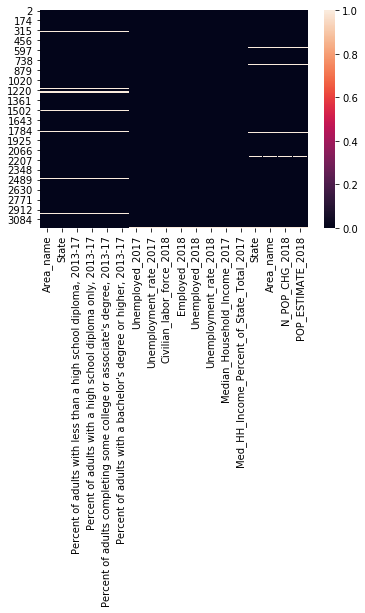

In [43]:
sns.heatmap(df.isna())

In [44]:
df.dropna(inplace=True)

# Real Estate
not sure if i'll use this yet -- too many missing counties

In [ ]:
# df_estate = pd.read_csv('/home/xristsos/flatiron/projects/where-are-missing-voters/new data/County_Zhvi_SingleFamilyResidence.csv',encoding = "ISO-8859-1")

In [ ]:
# df_estate.columns

In [ ]:
# df_estate.drop(columns=['Metro','StateCodeFIPS','RegionID','MunicipalCodeFIPS'],inplace=True)

In [ ]:
# df_estate = pd.DataFrame(df_estate[['2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
#           '2019-01','2019-02','2019-03','2019-04','2019-05','2019-06']])

In [ ]:
# df = pd.concat([df,df_estate],axis=1)

In [ ]:
# df.isna().sum()

# PCA

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [47]:
scaler = StandardScaler()
X = df.drop(columns=['State','Area_name'])
x_scaled = scaler.fit_transform(X)

In [48]:
pca = PCA()
pca_data = pca.fit_transform(x_scaled)

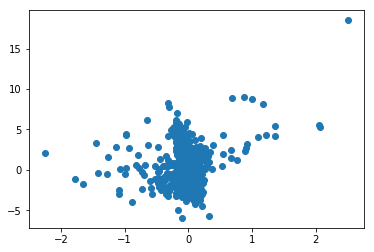

In [91]:
plt.scatter(pca_data[:,10],pca_data[:,1])

In [50]:
import numpy as np

In [57]:
# index = np.arange(18)
# sns.barplot(pca.explained_variance_ratio_,index)

ValueError: Grouper and axis must be same length

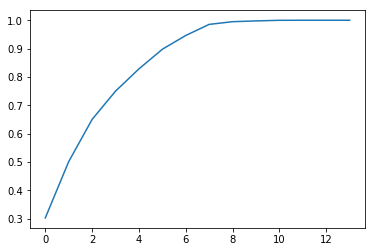

In [92]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

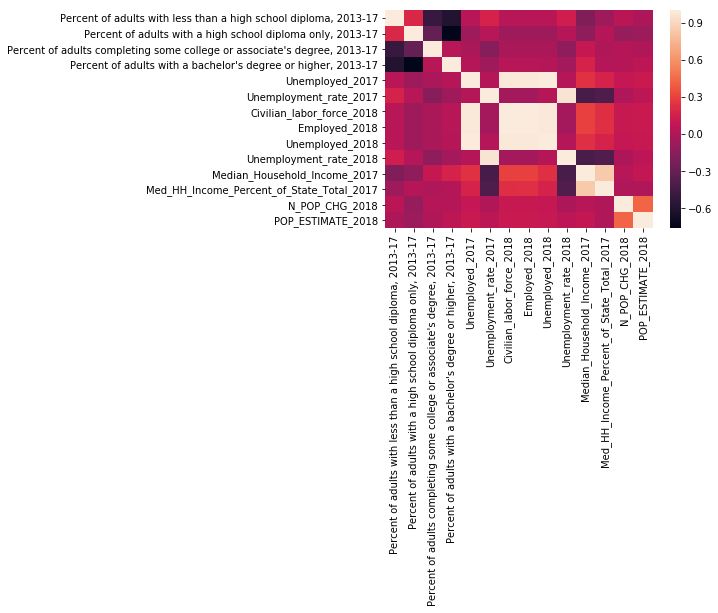

In [45]:
sns.heatmap(df.corr())

In [94]:
len(df.columns)

18

In [97]:
### keeping 7 of the features
df.drop(columns=['Unemployed_2017','Unemployed_2018','Civilian_labor_force_2018','Employed_2018','Unemployment_rate_2017','N_POP_CHG_2018'],inplace=True)

KeyError: "['Unemployed_2017' 'Unemployed_2018' 'Civilian_labor_force_2018'\n 'Employed_2018' 'Unemployment_rate_2017' 'N_POP_CHG_2018'] not found in axis"

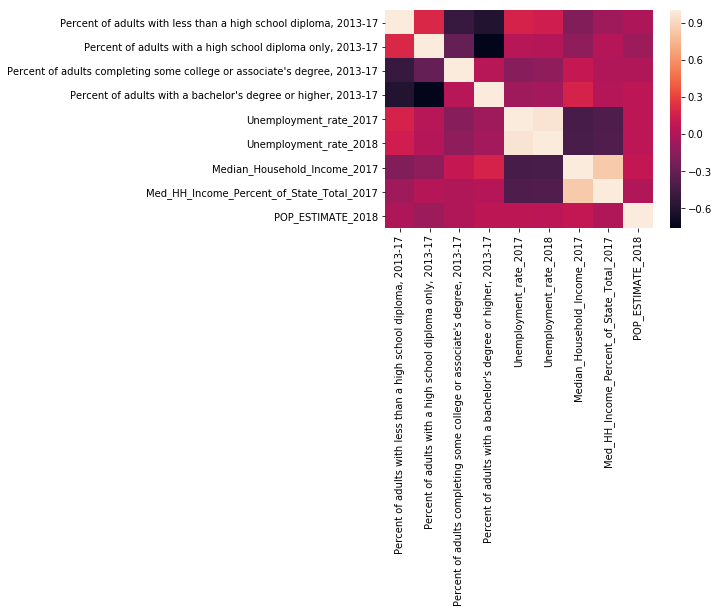

In [96]:
sns.heatmap(df.corr())